In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



/Users/mukaddercinar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/mukaddercinar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from sklearn.datasets import load_breast_cancer
bcdata = load_breast_cancer()
bcdata.target[[10, 50, 85]]


array([0, 1, 0])

In [3]:
list(bcdata.target_names)
['malignant', 'benign']

['malignant', 'benign']

In [4]:
bcdata.target.shape

(569,)

In [5]:
bcdata.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Run the PCA on unscaled Data

Text(0, 0.5, 'Second principal component')

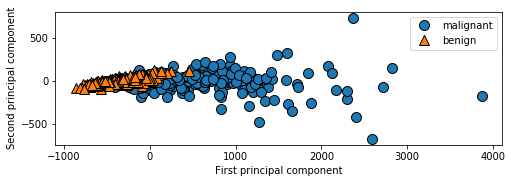

In [6]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(bcdata.data)

# transform data onto the first two principal components
X_pca1 = pca1.transform(bcdata.data)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], bcdata.target)
plt.legend(bcdata.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

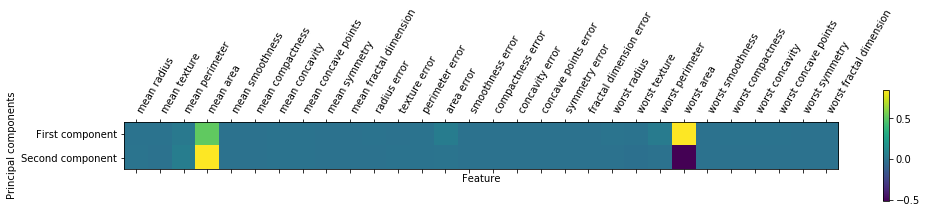

In [7]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(bcdata.feature_names)),
           bcdata.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(bcdata.data)
X_scaled = scaler.transform(bcdata.data)

### Run the PCA on scaled data

Text(0, 0.5, 'Second principal component')

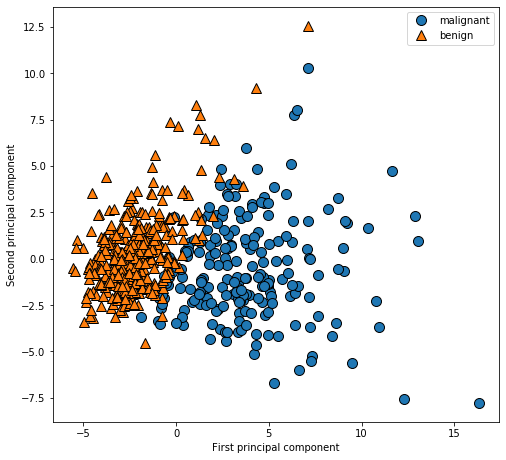

In [9]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], bcdata.target)
plt.legend(bcdata.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

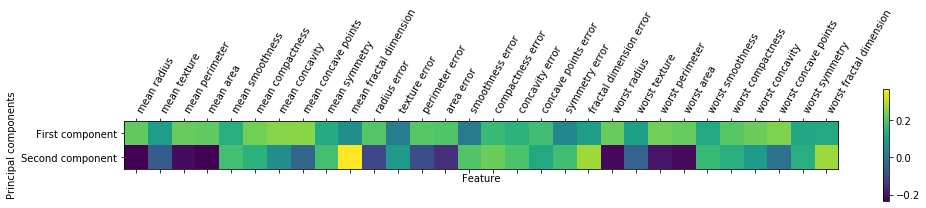

In [10]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(bcdata.feature_names)),
           bcdata.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Run NMF on unscaled data

Text(0, 0.5, 'Second basis component')

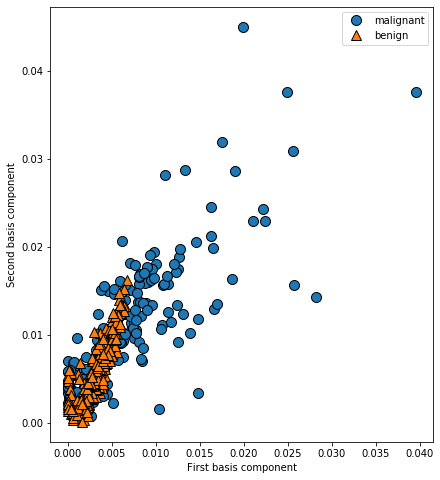

In [11]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf = NMF(n_components=2, random_state=0)
# fit NMF model to data
nmf.fit(abs(bcdata.data))
    
# transform data onto the first two principal components
X_nmf = nmf.transform(abs(X_scaled))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_nmf[:, 0], X_nmf[:, 1], bcdata.target)
plt.legend(bcdata.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

### Run NMF on scaled data

Text(0, 0.5, 'Second basis component')

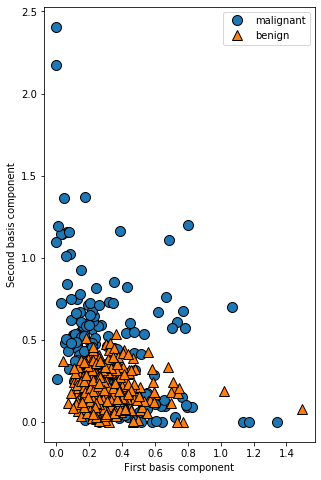

In [12]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf = NMF(n_components=2, random_state=0)
# fit NMF model to data
nmf.fit(abs(X_scaled))
    
# transform data onto the first two principal components
X_nmf = nmf.transform(abs(X_scaled))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_nmf[:, 0], X_nmf[:, 1], bcdata.target)
plt.legend(bcdata.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

### Run t-SNE on unscaled data

Text(0, 0.5, 'Second basis component')

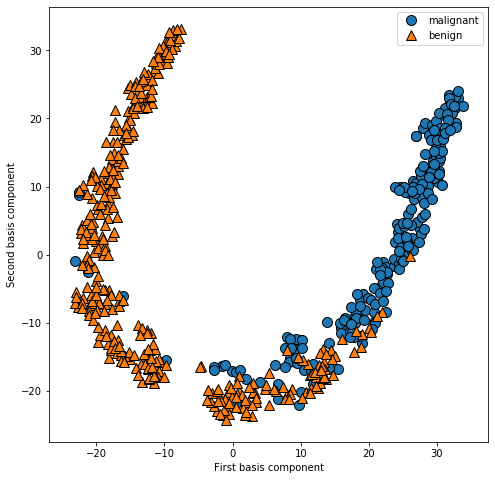

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(bcdata.data)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], bcdata.target)
plt.legend(bcdata.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

### Run t-SNE on scaled data

Text(0, 0.5, 'Second basis component')

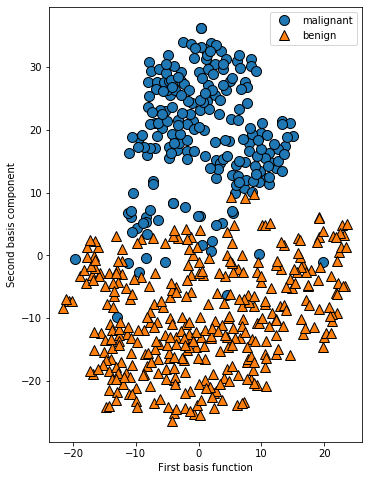

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], bcdata.target)
plt.legend(bcdata.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

### Dimensionality Reduction with PCA

#### Explained variance in PCA

In [15]:
# keep the first two principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [16]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


#### No Pre-processing

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X_scaled, bcdata.target):
    X_train = X_scaled[train_index]
    X_test = X_scaled[test_index]
    y_train = bcdata.target[train_index]
    y_test = bcdata.target[test_index]
    
model=LogisticRegression().fit(X_train, y_train)
#model = SVC(kernel='poly', C=10).fit(X_train, y_train)
#model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.98


#### Two principal components

In [18]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)
# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

for train_index, test_index in split.split(X_scaled, bcdata.target):
    X_train = X_pca2[train_index]
    X_test = X_pca2[test_index]
    y_train = bcdata.target[train_index]
    y_test = bcdata.target[test_index]

model=LogisticRegression().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.95


#### 95% Explained

In [19]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)
# transform data onto the first ten principal components
X_pca4 = pca4.transform(X_scaled)

for train_index, test_index in split.split(X_scaled, bcdata.target):
    X_train = X_pca4[train_index]
    X_test = X_pca4[test_index]
    y_train = bcdata.target[train_index]
    y_test = bcdata.target[test_index]
    
model=LogisticRegression().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.96


### K-Means

Text(0, 0.5, 'Feature 1')

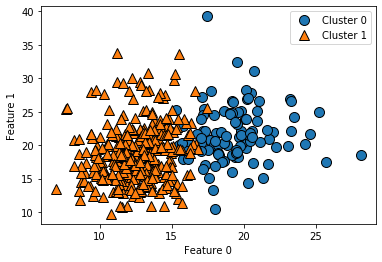

In [20]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(bcdata.data, bcdata.target):
    X_train = bcdata.data[train_index]
    X_test = bcdata.data[test_index]
    y_train = bcdata.target[train_index]
    y_test = bcdata.target[test_index]

# build the clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

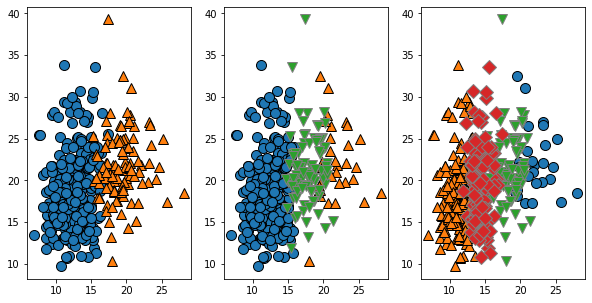

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[2])

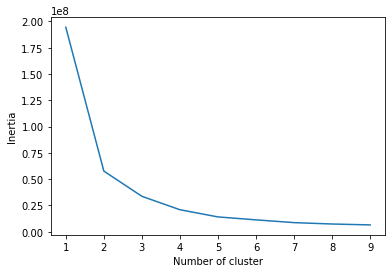

In [22]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

#### Agglomerative Clustering

Text(0, 0.5, 'Feature 1')

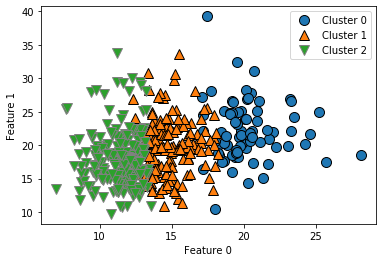

In [23]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

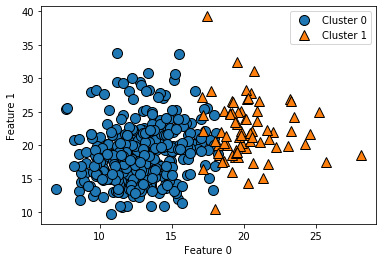

In [24]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

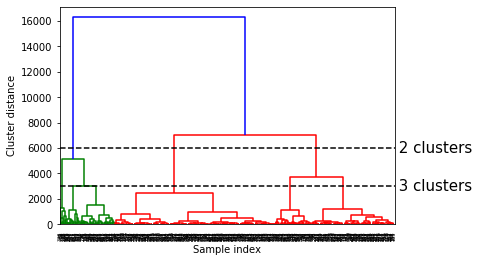

In [25]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [3001, 3001], '--', c='k')
ax.plot(bounds, [6000, 6000], '--', c='k')

ax.text(bounds[1], 3001, ' 3 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 6000, ' 2 clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### DBSCAN

Text(0, 0.5, 'Feature 1')

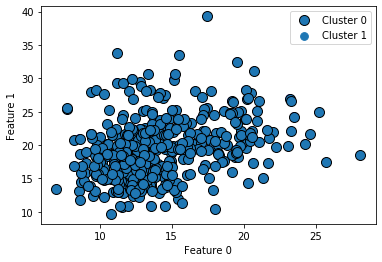

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1" ], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

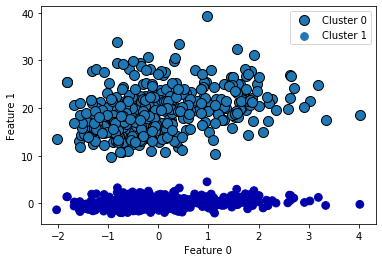

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Comparing clustering algorithms with ground truth

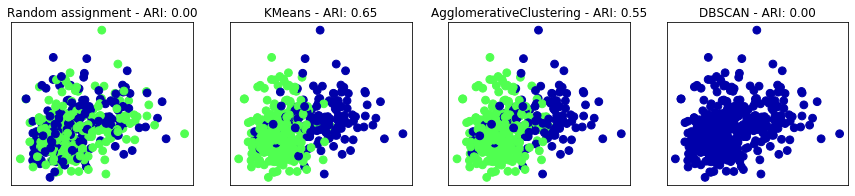

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

## Comparing clustering algorithms without ground truth

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

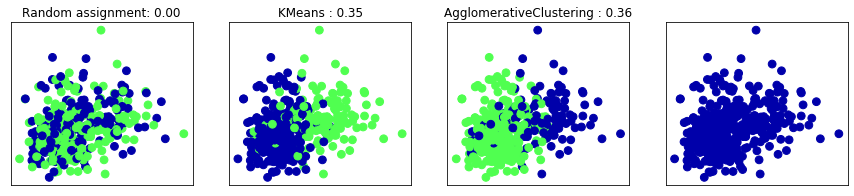

In [29]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))